In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import datetime
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (15,8)
%matplotlib inline

In [2]:
## This is small code to correct btc.csv file from coindesk. Because that csv has one extra comma at end.

#f = open('btc2.csv','a')
#for line in open('btc.csv').readlines():
#    l = line.strip('\n').strip(',')
#    f.write(l+'\n')
#f.close()

In [3]:
df = pd.read_csv('bt.csv',index_col='Date', parse_dates=True,
                 engine='python')
df2 = pd.read_csv('BTC.csv', index_col='date',parse_dates=True,names=['date','ranknow','open','high','low','close'],
                 engine='python',skiprows=1)
df3 = pd.read_csv('btc2.csv',index_col='date',parse_dates=True,
                  names=['date','txVolume(USD)','adjustedTxVolume(USD)','txCount','marketcap(USD)','price(USD)',
                         'exchangeVolume(USD)', 'generatedCoins','fees','activeAddresses', 'averageDifficulty',
                         'paymentCount','medianTxValue(USD)', 'medianFee','blockSize','blockCount'],
                  skiprows=1)

In [4]:
df3.dtypes

txVolume(USD)            float64
adjustedTxVolume(USD)    float64
txCount                    int64
marketcap(USD)           float64
price(USD)               float64
exchangeVolume(USD)      float64
generatedCoins           float64
fees                     float64
activeAddresses            int64
averageDifficulty        float64
paymentCount             float64
medianTxValue(USD)       float64
medianFee                float64
blockSize                  int64
blockCount                 int64
dtype: object

In [4]:
df3.dropna(subset=['txVolume(USD)','marketcap(USD)'],inplace=True)
df3.fillna(0,inplace=True)

In [5]:
df3.dtypes

txVolume(USD)            float64
adjustedTxVolume(USD)    float64
txCount                    int64
marketcap(USD)           float64
price(USD)               float64
exchangeVolume(USD)      float64
generatedCoins           float64
fees                     float64
activeAddresses            int64
averageDifficulty        float64
paymentCount             float64
medianTxValue(USD)       float64
medianFee                float64
blockSize                  int64
blockCount                 int64
dtype: object

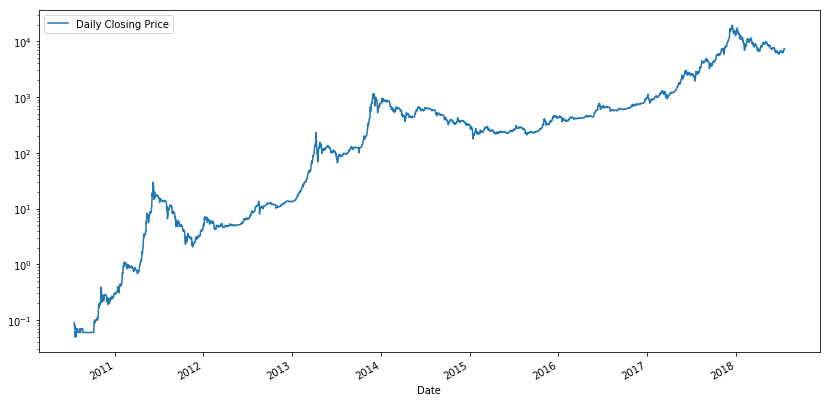

In [6]:
df.plot(figsize=(14,7),logy=True)

/home/sunny/anaconda2/envs/p3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


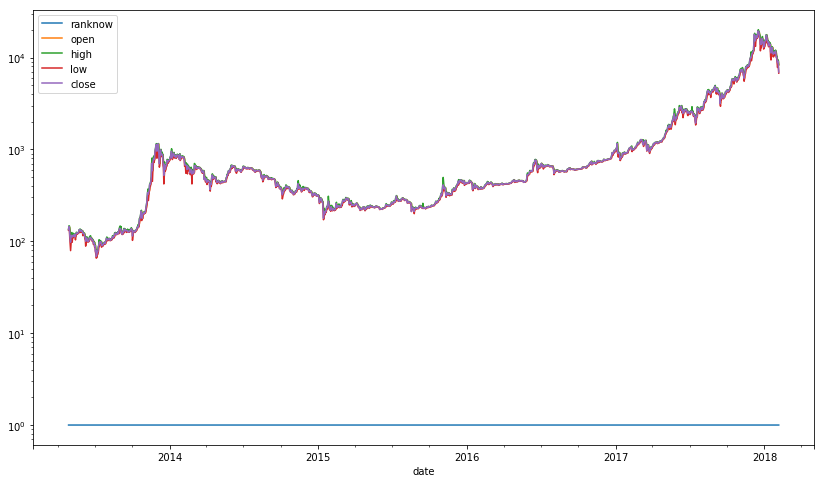

In [7]:
df2.plot(figsize=(14,8),logy=True)

In [8]:
#bitcoin = quandl.get("BCHAIN/MKPRU")

In [9]:
#bitcoin['Value'].replace(0, np.nan, inplace=True)
#bitcoin = bitcoin.dropna()
#bitcoin.Value.plot(logy=True,figsize=(15,8));
#plt.legend()

In [10]:
df['Returns'] = (df['Daily Closing Price'].pct_change() + 1).fillna(1)
df.head()

,Daily Closing Price,Returns
Date,,
2010-07-18,0.09,1.000000
2010-07-19,0.08,0.888889
2010-07-20,0.07,0.875000
2010-07-21,0.08,1.142857
2010-07-22,0.05,0.625000


In [11]:
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_returns_bitcoin = np.random.choice(df.Returns, size=(len(dates), 100))
sim_bitcoin_returns = pd.DataFrame(data=simulated_returns_bitcoin, index=dates)
print(sim_bitcoin_returns.shape)
cum_sim_bitcoin = sim_bitcoin_returns.cumprod(axis=0)
print(cum_sim_bitcoin.shape)

(143, 100)
(143, 100)


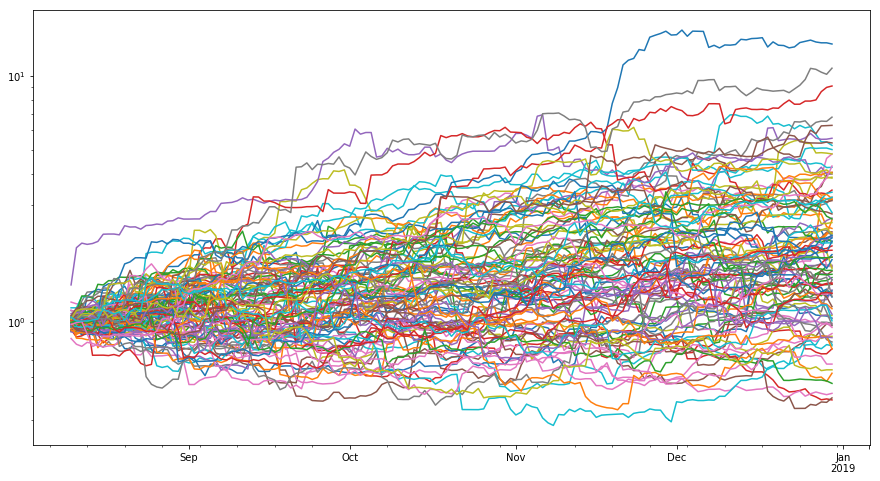

In [12]:
cum_sim_bitcoin.plot(logy=True,legend=False,figsize=(15,8))

In [13]:
future = pd.DataFrame(data=cum_sim_bitcoin, index=dates)
future = future * df['Daily Closing Price'][-1]
future.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2018-08-10,7586.932163,7519.682051,7189.041223,7316.908367,7438.958927,7037.286226,8839.626241,8162.073011,7331.690000,7390.689338,...,7284.109711,7448.894069,7323.448627,7452.853276,7606.526527,7140.880113,7159.696958,7667.065641,7506.617672,7678.185337
2018-08-11,6929.963177,7557.334250,7818.060955,7286.673208,7442.575338,7262.797755,8697.100639,8072.625636,7218.778171,7287.283006,...,7480.701681,6307.655640,7362.298109,7541.842569,8035.364769,6793.083949,7293.329118,7456.387448,8171.761010,7404.916945
2018-08-12,6990.424404,7585.444879,8127.229296,7531.163142,7806.257462,7218.064739,8684.235106,8923.643479,7298.947143,7115.817523,...,7604.463618,6294.206481,7135.765859,7414.915277,7992.923238,6729.434951,7371.101377,7747.217965,8272.045495,7404.916945
2018-08-13,7021.378313,7620.397011,8283.842812,7500.423701,7723.564057,7365.645989,8212.586826,9704.435750,7669.572951,7340.988149,...,7462.324112,6215.835038,6760.489696,7589.857134,8407.961237,6664.632985,6557.114722,7673.434937,8285.538545,7404.916945
2018-08-14,7092.301326,7107.121024,8446.271103,7463.887190,6781.666001,7448.909667,8212.586826,9743.507022,7585.013161,6973.938742,...,7448.619200,6227.620019,6807.524049,7495.489461,8567.001573,6720.507877,5838.661014,7547.923103,8270.391309,7480.576559


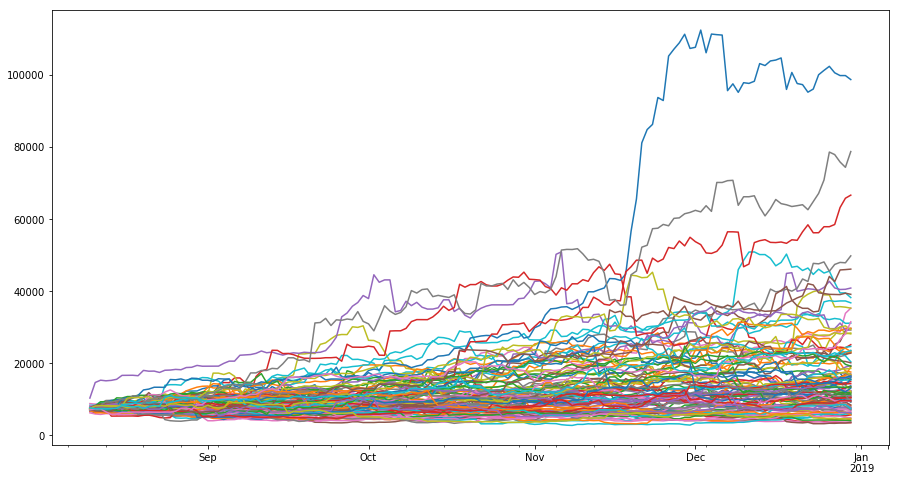

In [14]:
future.plot(legend=False, figsize=(15,8))

Text(0,0.5,'Price ($)')

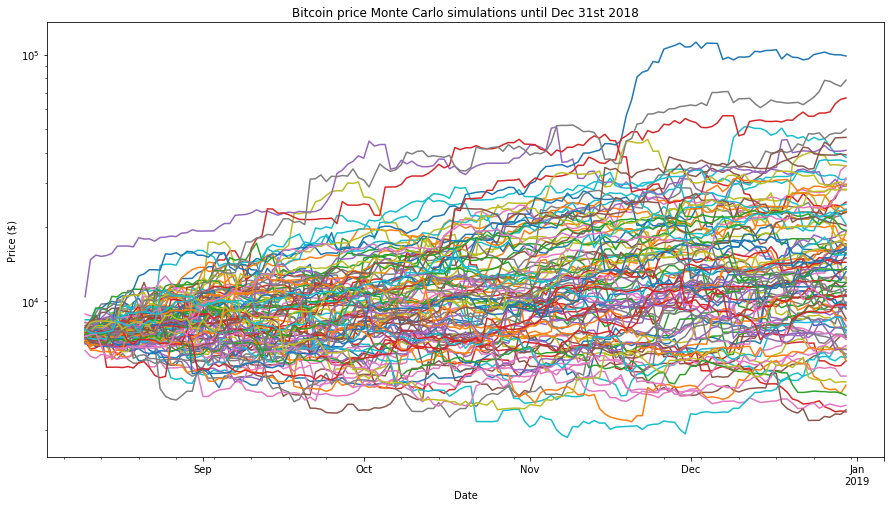

In [15]:
future.plot(logy=True,legend=False, figsize=(15,8),
            title='Bitcoin price Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("Price ($)")

In [16]:
#bitcoin.tail(5),df.tail(5)

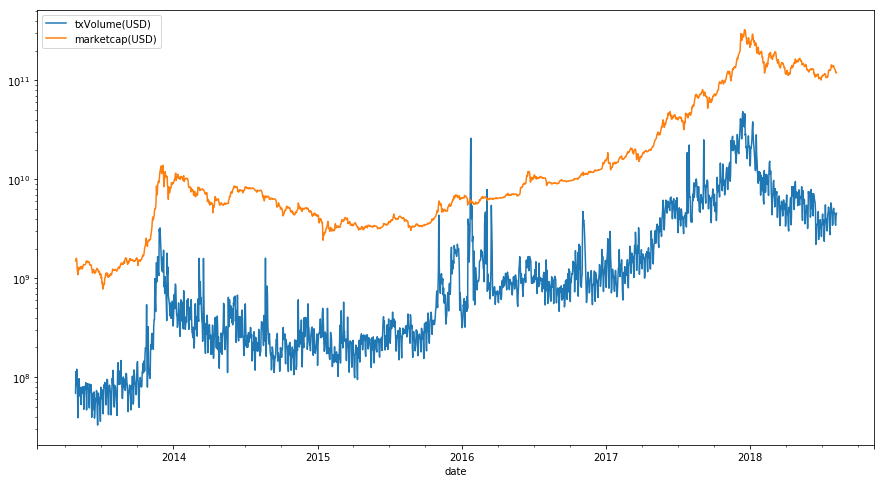

In [17]:
df3[['txVolume(USD)','marketcap(USD)']].plot(figsize=(15,8),logy=True)

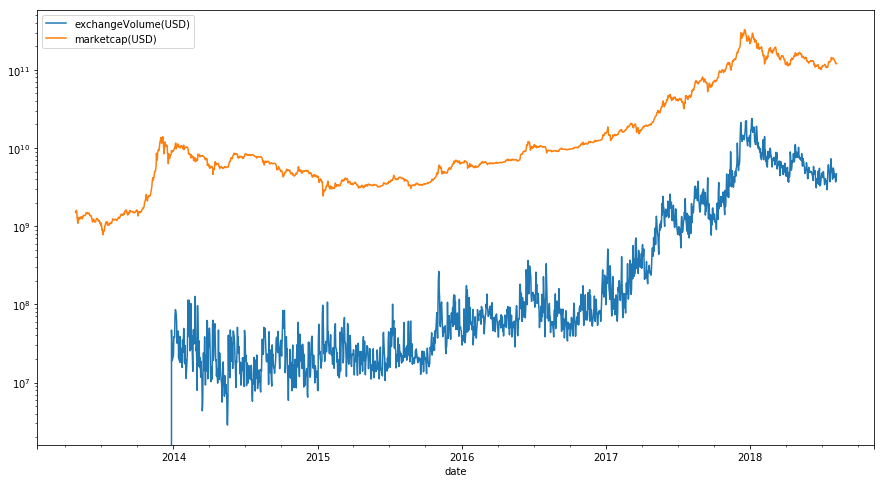

In [18]:
df3[['exchangeVolume(USD)','marketcap(USD)']].plot(figsize=(15,8),logy=True)

In [19]:
df3['NVT'] = df3['marketcap(USD)'] / df3['txVolume(USD)']
df3.fillna(0,inplace=True)

In [20]:
df3.tail(5)['NVT']

date
2018-08-03    28.554939
2018-08-04    35.576221
2018-08-05    35.103984
2018-08-06    28.528188
2018-08-07    26.307649
Name: NVT, dtype: float64

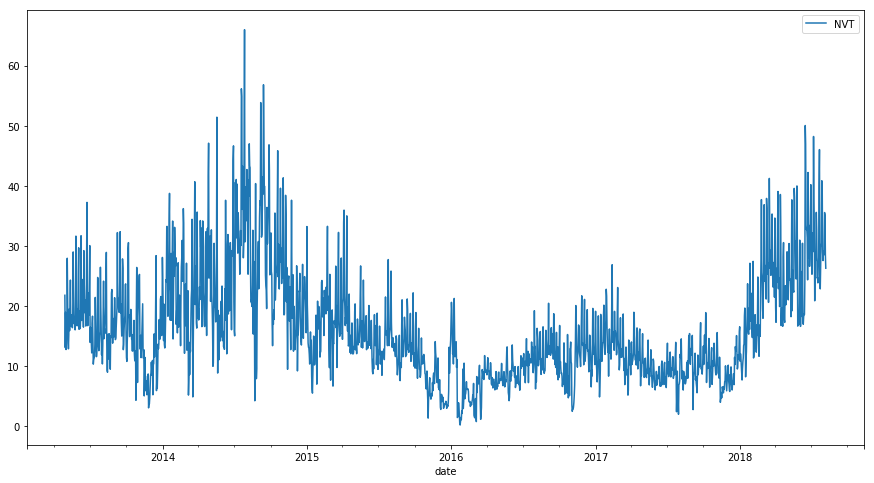

In [21]:
df3[['NVT']].plot(figsize=(15,8))

In [22]:
o = np.convolve(list(reversed(list(df3.NVT.values))), np.ones((14,))/14., mode='same')
o = list(reversed(o))
#print(o)
df3['SMOOTH_NVT'] = o
df3['SMOOTH_NVT'] = np.convolve(df3.NVT.values, np.ones((14,))/14., mode='same')

In [23]:
df3['SMOOTH_NVT'][:5]

date
2013-04-28     8.906541
2013-04-29    10.476616
2013-04-30    11.551713
2013-05-01    12.473677
2013-05-02    13.563958
Name: SMOOTH_NVT, dtype: float64

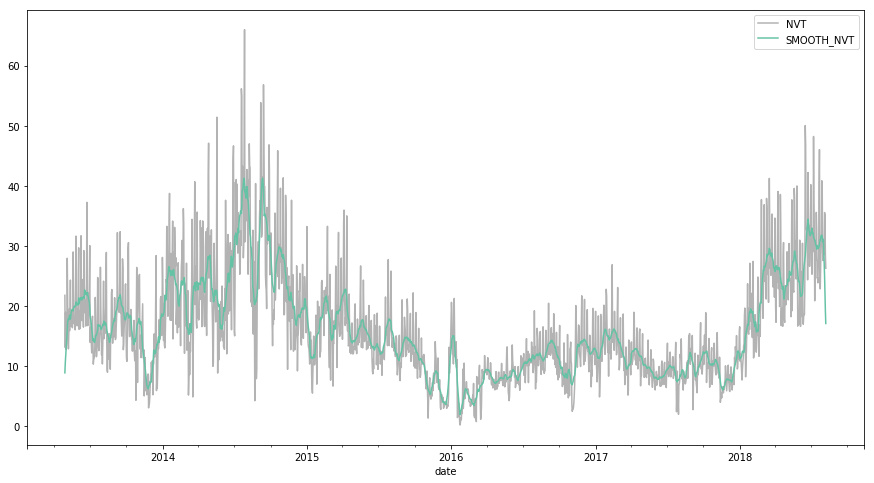

In [24]:
df3[['NVT','SMOOTH_NVT']].plot(figsize=(15,8),colormap=plt.cm.Set2_r)

In [25]:
df3['MCAP'] = df3['marketcap(USD)'] / 10e9

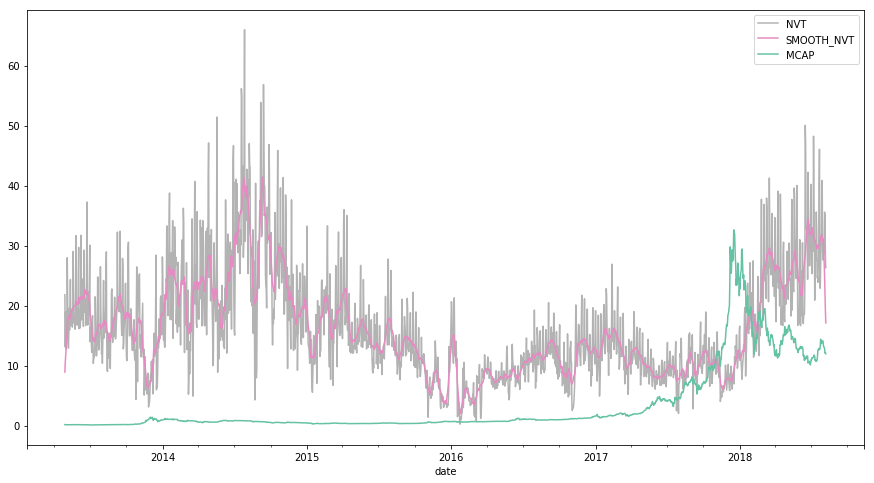

In [26]:
df3[['NVT','SMOOTH_NVT','MCAP']].plot(figsize=(15,8),colormap=plt.cm.Set2_r)

In [27]:
df3.index.name = 'Date'

In [28]:
#df3.reset_index(inplace=True)
#df3.Date = [datetime.date(d.year,d.month,1) for d in df3.Date]
#df3 = df3.groupby(['Date']).sum()
#df3[['NVT','SMTH_NVT','MCAP']].plot(figsize=(15,8),colormap=plt.cm.Set2_r)

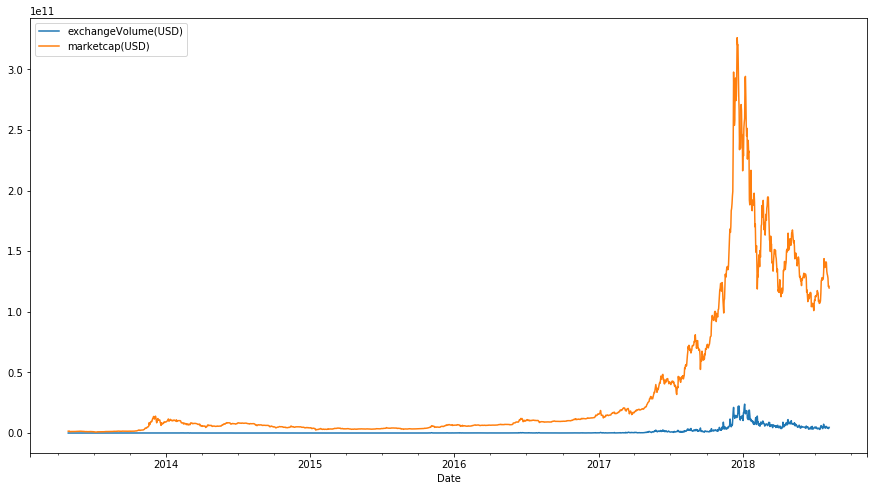

In [29]:
df3[['exchangeVolume(USD)','marketcap(USD)']].plot(figsize=(15,8))

Text(0,0.5,'txVolume(USD)')

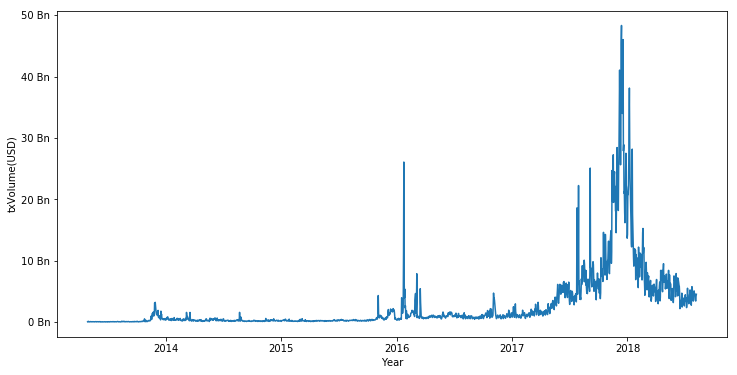

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df3.index.values,df3['txVolume(USD)'].values)
l,t = plt.yticks([0,10e9,20e9,30e9,40e9,50e9],['0 Bn','10 Bn','20 Bn','30 Bn','40 Bn','50 Bn'])                 
#plt.plot(df3.index.values,df3['marketcap(USD)'].values)
plt.xlabel('Year')
plt.ylabel('txVolume(USD)')
#plt.axes()
#plt.plot(df3.index.values,df3['marketcap(USD)'].values)

In [31]:
df3['NVT_R'] = (df3['NVT'].pct_change() + 1).fillna(1)
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_nvt = np.random.choice(df3.NVT_R, size=(len(dates), 100))
sim_nvt = pd.DataFrame(data=simulated_nvt, index=dates)
cum_sim_nvt = sim_nvt.cumprod(axis=0)
future2 = pd.DataFrame(data=cum_sim_nvt, index=dates)
future2 = future2 * df3['NVT'][-1]

Text(0,0.5,'NVT')

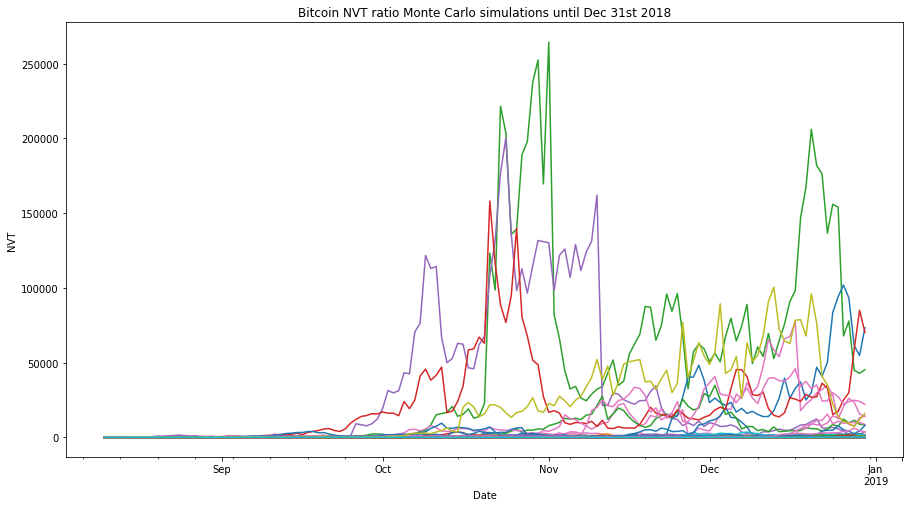

In [32]:
future2.plot(legend=False, figsize=(15,8),
            title='Bitcoin NVT ratio Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("NVT")

In [33]:
df3['txVolume_R'] = (df3['txVolume(USD)'].pct_change() + 1).fillna(1)
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_tx_vol = np.random.choice(df3.txVolume_R, size=(len(dates), 10))
sim_tx_vol = pd.DataFrame(data=simulated_tx_vol, index=dates)
cum_sim_tx_vol = sim_tx_vol.cumprod(axis=0)
future3 = pd.DataFrame(data=cum_sim_tx_vol, index=dates)
future3 = future3 * df3['txVolume(USD)'][-1]

df3['marketcap_R'] = (df3['marketcap(USD)'].pct_change() + 1).fillna(1)
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_marketcap_R = np.random.choice(df3.marketcap_R, size=(len(dates), 10))
sim_marketcap_R = pd.DataFrame(data=simulated_marketcap_R, index=dates)
cum_sim_marketcap_R = sim_marketcap_R.cumprod(axis=0)
future4 = pd.DataFrame(data=cum_sim_marketcap_R, index=dates)
future4 = future4 * df3['marketcap(USD)'][-1]

In [34]:
future3.shape,future4.shape

((143, 10), (143, 10))

In [35]:
df4 = pd.DataFrame(data = future4.values / future3.values)
df4 = df4.set_index(future4.index)

Text(0,0.5,'NVT')

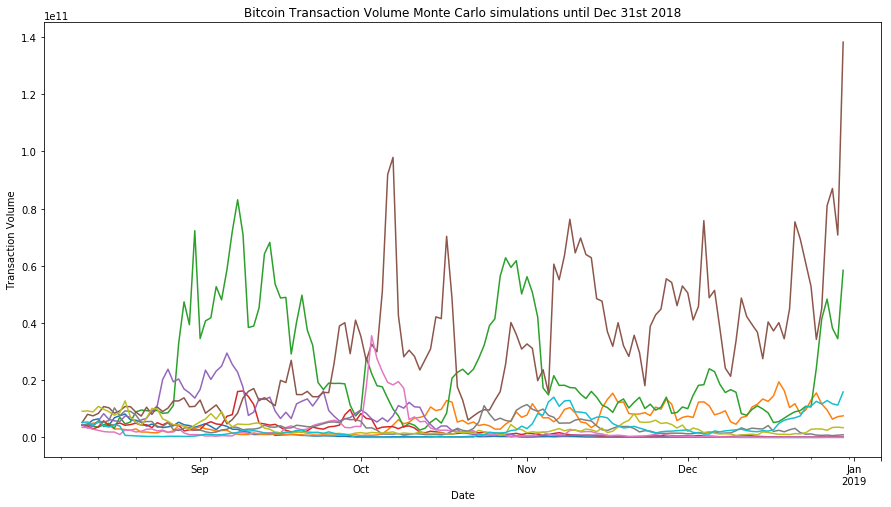

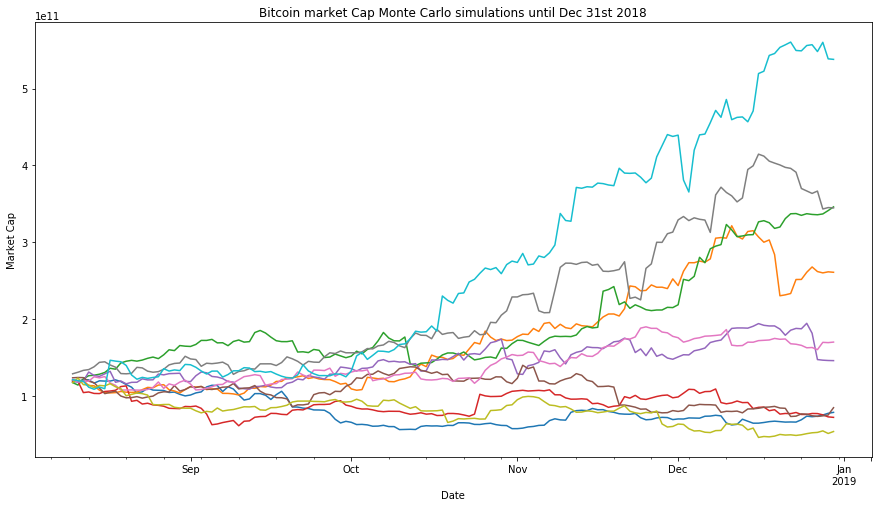

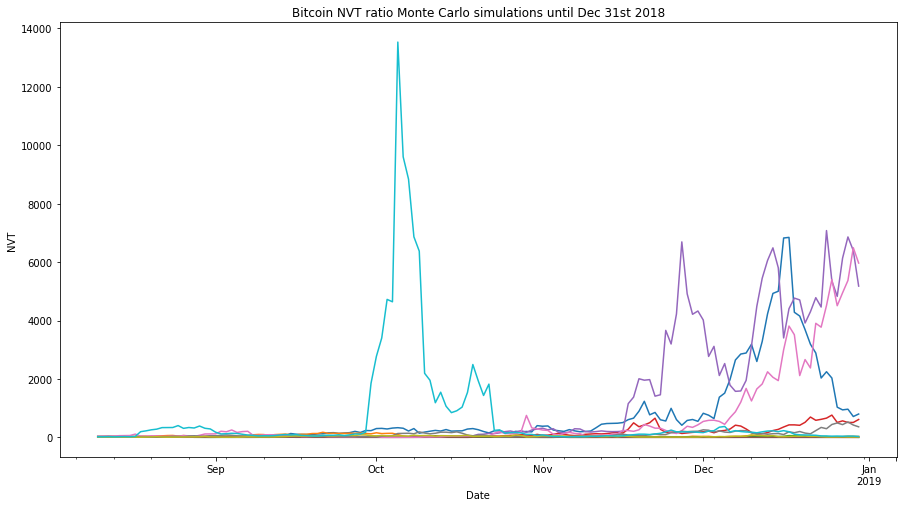

In [36]:
future3.plot(legend=False, figsize=(15,8), title='Bitcoin Transaction Volume Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("Transaction Volume")
future4.plot(legend=False, figsize=(15,8), title='Bitcoin market Cap Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("Market Cap")
df4.plot(legend=False, figsize=(15,8),
            title='Bitcoin NVT ratio Monte Carlo simulations until Dec 31st 2018')
plt.Circle((2000,'2018-09-01'),20,visible=True,fill=True)
plt.xlabel('Date')
plt.ylabel("NVT")

In [37]:
df3.head()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,...,medianTxValue(USD),medianFee,blockSize,blockCount,NVT,SMOOTH_NVT,MCAP,NVT_R,txVolume_R,marketcap_R
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,6.879868e+07,3.153714e+07,41702,1.500520e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,...,49.980091,0.0005,21597536,177,21.810300,8.906541,0.150052,1.000000,1.000000,1.000000
2013-04-29,1.138128e+08,4.821652e+07,51602,1.491160e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,...,62.425891,0.0005,25676453,174,13.101861,10.476616,0.149116,0.600719,1.654288,0.993762
2013-04-30,8.426632e+07,5.686790e+07,47450,1.597780e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,...,26.942145,0.0005,27042465,149,18.961074,11.551713,0.159778,1.447205,0.740394,1.071501
2013-05-01,1.206825e+08,8.208736e+07,55176,1.542820e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,...,38.671980,0.0005,25727393,151,12.784120,12.473677,0.154282,0.674230,1.432156,0.965602
2013-05-02,9.337533e+07,5.823736e+07,55295,1.292190e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,...,35.382348,0.0005,26388234,134,13.838666,13.563958,0.129219,1.082489,0.773727,0.837551


In [38]:
plt.Circle((5,5),2,visible=True)

Text(0,0.5,'NVT')

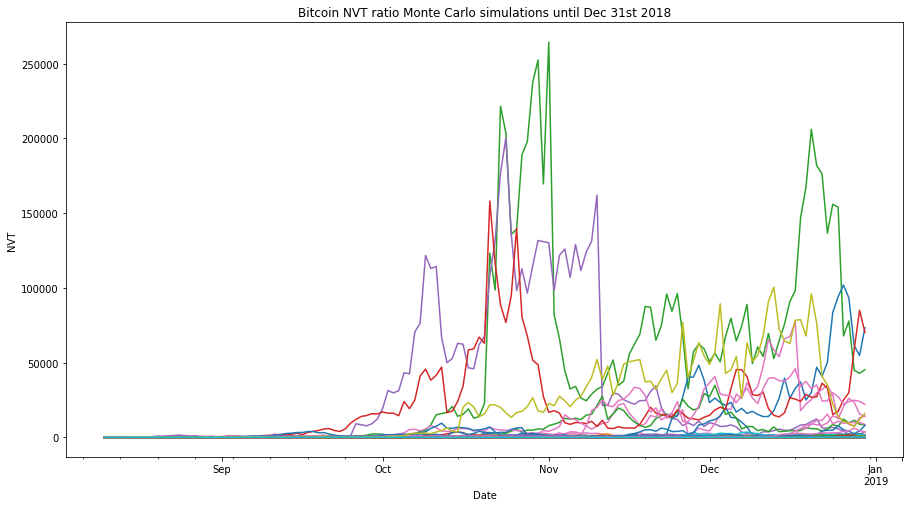

In [39]:
future2.plot(legend=False, figsize=(15,8),
            title='Bitcoin NVT ratio Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("NVT")
#plt.axhline(y=50000,xmin=0,xmax=10000,color='blue')
#plt.axvline(x=50,ymin=0,ymax=10000,color='blue')

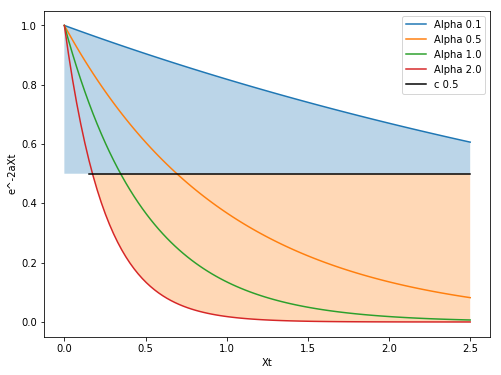

In [40]:
fig = plt.figure(figsize=(8,6))
Xt = np.linspace(0,2.5,100)
c = 0.5
for alpha in [0.1, 0.5, 1.0, 2.0]:
    plt.plot(Xt,np.exp(Xt*alpha*-2),label='Alpha %s'%alpha)    
t = zip(Xt,np.exp(Xt*alpha*-2))
location = [(j,i) for j,i in enumerate(t) if  str(i[1])[:3] == '0.5']
#print(location)
plt.plot(Xt[location[0][0]:],[c]*len(Xt[location[0][0]:]),color='black',label='c %s'%c)

y2 = np.array(len(Xt)*[c])
upper = zip(Xt,np.exp(Xt*2.1*-2))

plt.fill_between(Xt, y2 ,np.exp(Xt*0.1*-2), alpha=0.3)
plt.fill_between(Xt, y2, np.exp(Xt*2.0*-2), where= Xt > location[0][1][0], alpha=0.3)
plt.xlabel('Xt')
plt.ylabel('e^-2aXt')
plt.legend(loc='best')

In [41]:
def get_brownian(n):
    # Process parameters
    delta = 0.25
    dt = 1.0/250.0
    # Initial condition.
    x = 0.0
    Wt = [0.0]
    # Iterate to compute the steps of the Brownian motion.
    for k in range(n):
        x = x + norm.rvs(scale=delta**2*dt)
        Wt.append(x)
    return Wt

In [45]:
def get_series():
    dt = 1.0 / 250.0
    tim = np.arange(0.0,4.0,dt)
    alpha = 1.0
    eta = 0.1
    c = 0.5
    Xt = np.zeros(len(tim)+1)
    dWt = get_brownian(len(tim))

    for i in range(1000):
        t = np.exp(-2.0 * alpha * Xt[i]) - c
        dXt = (eta * t * dt) + dWt[i]
        #if str(t)[:3] == '0.5':
        #    eq = dXt
            #print(eq)
        #if str(t)[:4] == '0.05':
        #    eq10 = dXt
            #print(eq10)
        Xt[i+1] = dXt
    return np.array(Xt),tim#,eq,eq10

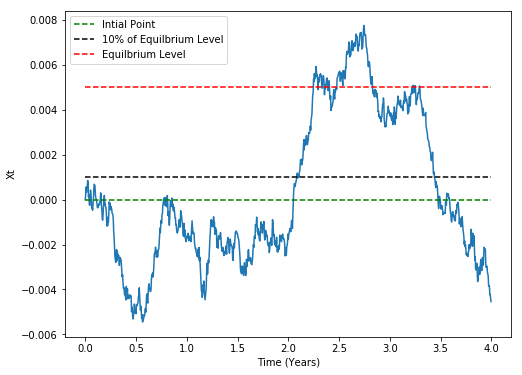

In [123]:
#Xt,eq,eq10 = get_series()
Xt,tim = get_series()
fig = plt.figure(figsize=(8,6))
plt.plot(tim,Xt[:len(tim)])
plt.plot(tim, len(tim)*[0.0],linestyle='dashed',label='Intial Point',color='green')

plt.plot(tim, len(tim)*[0.001],linestyle='dashed',label = '10% of Equilbrium Level',color='black')
plt.plot(tim, len(tim)*[0.005],linestyle='dashed',label = 'Equilbrium Level',color='red')
plt.xlabel('Time (Years)')
plt.ylabel('Xt')
plt.legend(loc='best')

In [124]:
ixic = pd.read_csv('^IXIC.csv',index_col='Date',parse_dates=True)
ssec = pd.read_csv('^SSEC.csv',index_col='Date',parse_dates=True)

In [125]:
ixic.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-31,1289.239990,1291.880005,1285.449951,1291.030029,1291.030029,666010000
1997-01-02,1292.650024,1293.630005,1272.339966,1280.699951,1280.699951,492350000
1997-01-03,1288.020020,1310.839966,1280.699951,1310.680054,1310.680054,519140000
1997-01-06,1314.339966,1321.469971,1310.630005,1316.400024,1316.400024,588140000
1997-01-07,1316.910034,1327.819946,1312.079956,1327.729980,1327.729980,577740000


In [126]:
ssec.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-04,1163.878052,1181.004028,1161.906006,1180.963013,1180.963013,23200.0
2006-01-05,1183.305054,1197.837036,1180.451050,1197.269043,1197.269043,29400.0
2006-01-06,1198.811035,1215.536011,1191.614014,1209.421997,1209.421997,34400.0
2006-01-09,1210.319946,1217.313965,1205.248047,1215.667969,1215.667969,28800.0
2006-01-10,1215.848022,1220.755981,1203.651001,1220.618042,1220.618042,26800.0


In [175]:
#ixic.index.name = 'Date'
t1 = [int(i) for i in '1997-01-02'.split('-')]   # (P0 = 1, 280), (Pt = 1, 436)
t2 = [int(i) for i in '1997-06-26'.split('-')]

X1 = ixic[(ixic.index > pd.to_datetime('1997-01-02')) & (ixic.index < pd.to_datetime('1997-06-26'))] 

t3 = [int(i) for i in '1997-06-26'.split('-')] # (Pt = 1, 436), (P t = 2, 309)
t4 = [int(i) for i in '1999-02-10'.split('-')]

X2 = ixic[(ixic.index > pd.to_datetime('1997-06-26')) & (ixic.index < pd.to_datetime('1999-02-10'))] 

t5 = [int(i) for i in '1999-02-10'.split('-')]  #(P = 2, 309), (P = 3, 171).
t6 = [int(i) for i in '2000-10-18'.split('-')]

X3 = ixic[(ixic.index > pd.to_datetime('1999-02-10')) & (ixic.index < pd.to_datetime('2000-10-18'))] 

XR_hat = 0.67 # (PR = 2, 502).
eta_hat = 0.39
alpha_hat = 0.23
sigma_hat = 0.43
c_hat = 0.73

##  OU Process
k_hat, mu_hat,sig_hat = (0.47, 1.09, 0.31)

## BM Process
mw_hat, sigm_hat = (0.25, 0.31)

#ixic[['Close','Adj Close']].plot(figsize=(8,6))
def get_series2(dt , eta_hat,alpha_hat,sigma_hat,c_hat, total ):
    tim = np.arange(0.0,total,1)
    Xt = np.zeros(len(tim))
    dWt = get_brownian(len(tim))

    for i in range(len(tim)-1):
        t = np.exp(-2.0 * alpha_hat * (Xt[i]/sigma_hat)) - c_hat
        dXt = (eta_hat * t * dt) + dWt[i]
        Xt[i+1] = dXt
    return np.array(Xt),tim
total = (len(X1)+len(X2)+len(X3))
dt = 1.0 / total
Xt,tim = get_series2(dt,eta_hat,alpha_hat,sigma_hat,c_hat,total)

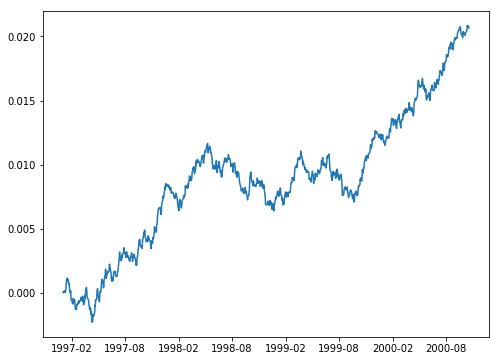

In [176]:
plt.figure(figsize = (8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),Xt)

In [177]:
X_F = np.array(list(X1.Close.values)+list(X2.Close.values) + list(X3.Close.values))
X_F += Xt

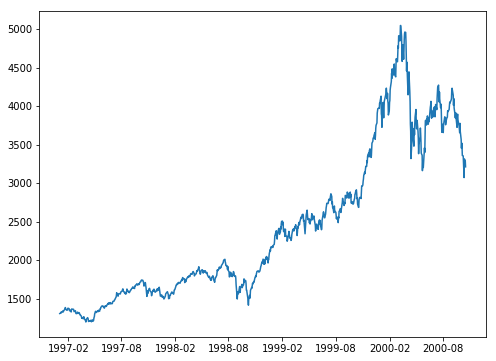

In [178]:
plt.figure(figsize=(8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),X_F)

In [166]:
# Shangai 
t1 = [int(i) for i in '2006-01-04'.split('-')]   # (P0 = 1, 180), (P t = 1,288)
t2 = [int(i) for i in '2006-03-06'.split('-')]

X1 = ssec[(ssec.index > pd.to_datetime('2006-01-04')) & (ssec.index < pd.to_datetime('2006-03-06'))] 

t3 = [int(i) for i in '2006-03-06'.split('-')] # (Pt1 = 1, 288), (Pt2 = 4, 053)
t4 = [int(i) for i in '2007-05-30'.split('-')]

X2 = ssec[(ssec.index > pd.to_datetime('2006-03-06')) & (ssec.index < pd.to_datetime('2007-05-30'))] 

t5 = [int(i) for i in '2007-05-30'.split('-')]  # (P = 4, 053) to  (P = 3, 116).
t6 = [int(i) for i in '2008-04-21'.split('-')]

X3 = ssec[(ssec.index > pd.to_datetime('2007-05-30')) & (ssec.index < pd.to_datetime('2008-04-21'))] 

XR_hat = 1.23 # (P R = 4, 040).
eta_hat = 0.32
alpha_hat = 0.14
sigma_hat = 0.56
c_hat = 0.70

##  OU Process
k_hat, mu_hat,sig_hat = (3.30, 0.97, 1.20)

## BM Process
mw_hat, sigm_hat = (0.44, 0.33)

#ixic[['Close','Adj Close']].plot(figsize=(8,6))
def get_series2(dt , eta_hat,alpha_hat,sigma_hat,c_hat, total ):
    tim = np.arange(0.0,total,1)
    Xt = np.zeros(len(tim))
    dWt = get_brownian(len(tim))

    for i in range(len(tim)-1):
        t = np.exp(-2.0 * alpha_hat * (Xt[i]/sigma_hat)) - c_hat
        dXt = (eta_hat * t * dt) + dWt[i]
        Xt[i+1] = dXt
    return np.array(Xt),tim
total = (len(X1)+len(X2)+len(X3))
dt = 1.0 / total
Xt,tim = get_series2(dt,eta_hat,alpha_hat,sigma_hat,c_hat,total)

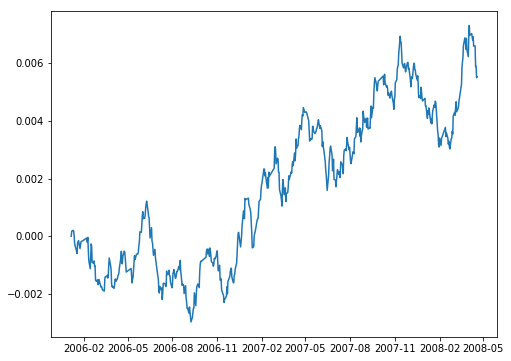

In [168]:
plt.figure(figsize = (8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),Xt)

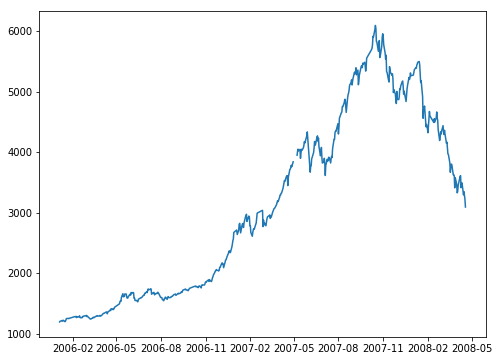

In [169]:
X_F = np.array(list(X1.Close.values)+list(X2.Close.values) + list(X3.Close.values))
X_F += Xt
plt.figure(figsize=(8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),X_F)

In [170]:
t1 = [int(i) for i in '2016-01-01'.split('-')]
t2 = [int(i) for i in '2016-05-30'.split('-')]

X1 = df[(df.index.date > datetime.date(*t1)) & (df.index.date < datetime.date(*t2))] #(P0 = 433), (Pt1 = 528)

t3 = [int(i) for i in '2016-05-30'.split('-')]
t4 = [int(i) for i in '2017-08-13'.split('-')]

X2 = df[(df.index.date > datetime.date(*t3)) & (df.index.date < datetime.date(*t4))] #(Pt = 528), (Pt = 4,327);

t5 = [int(i) for i in '2017-08-13'.split('-')]
t6 = [int(i) for i in '2017-12-10'.split('-')]

X3 = df[(df.index.date > datetime.date(*t5)) & (df.index.date < datetime.date(*t6))] # (P = 4,327), (P = 14,371).

XR_hat = 2.30 # (PR = 4, 327);
eta_hat = 0.51
alpha_hat = 0.08
sigma_hat = 0.91
c_hat = 0.69

def get_series2(dt , eta_hat,alpha_hat,sigma_hat,c_hat, total ):
    tim = np.arange(0.0,total,1)
    Xt = np.zeros(len(tim))
    dWt = get_brownian(len(tim))

    for i in range(len(tim)-1):
        t = np.exp(-2.0 * alpha_hat * (Xt[i]/sigma_hat)) - c_hat
        dXt = (eta_hat * t * dt) + dWt[i]
        Xt[i+1] = dXt
    return np.array(Xt),tim
total = (len(X1)+len(X2)+len(X3))
dt = 1.0 / total
Xt,tim = get_series2(dt,eta_hat,alpha_hat,sigma_hat,c_hat,total)

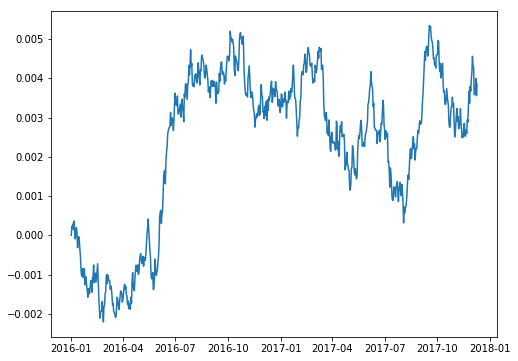

In [172]:
plt.figure(figsize = (8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),Xt)

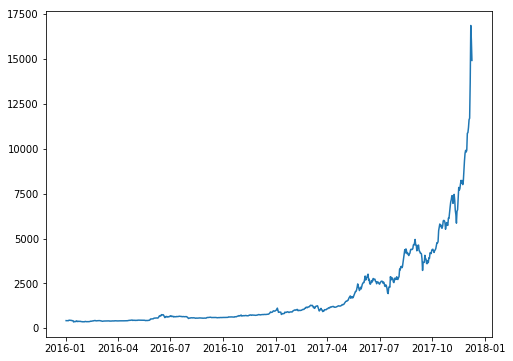

In [174]:
X_F = np.array(list(X1['Daily Closing Price'].values)+list(X2['Daily Closing Price'].values) + list(X3['Daily Closing Price'].values))
X_F += Xt
plt.figure(figsize=(8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),X_F)
#plt.plot(list(X1.index)+list(X2.index)+list(X3.index),np.log(X_F))

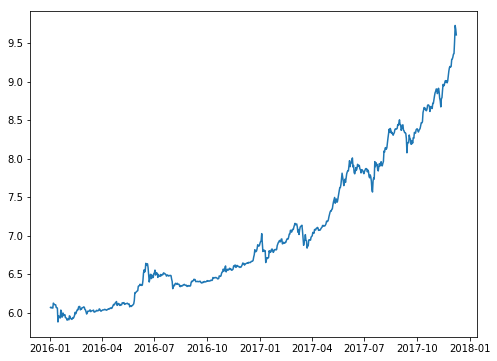

In [157]:
plt.figure(figsize=(8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),np.log(X_F))